# Homework 2. Loss functions.
Загружаем данные и устанавливаем фиксированный random_state.

In [69]:
# ! python -m pip install datasets
from datasets import load_dataset
from sklearn.model_selection import train_test_split 
import random
import numpy as np
import pandas as pd
rand_state = 42
random.seed(rand_state)
np.random.seed(rand_state)

df = load_dataset("scikit-learn/auto-mpg")["train"].to_pandas()
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


Взглянем на типы данных: видно, что помимо марки автомобиля есть еще одна колонка, которая не соответствует типу - horsepower. Если посмотреть на уникальные значения, то увидим там '?', соответственно учтем это при чистке данных. Так как пропущенных данных всего 1,5%, предлагается удалить их вместо заполнения пропусков. 

In [70]:
print('Колонки, у которых не численный тип данных: ', list(df.dtypes[df.dtypes == object].index))
print('Уникальные значения данных horsepower: ', list(set(df['horsepower'])))
print('Процент пропущенных данных:', round(len(df[df['horsepower']=='?'])/len(df) * 100,2), ' %')

Колонки, у которых не численный тип данных:  ['horsepower', 'car name']
Уникальные значения данных horsepower:  ['80', '110', '68', '198', '66', '125', '93', '91', '152', '65', '71', '81', '160', '98', '82', '92', '158', '139', '129', '208', '148', '?', '108', '137', '115', '69', '230', '87', '88', '132', '175', '97', '135', '63', '67', '190', '193', '112', '70', '105', '149', '120', '102', '122', '86', '153', '225', '83', '62', '78', '46', '61', '130', '85', '52', '54', '220', '95', '116', '150', '180', '94', '64', '165', '133', '100', '103', '96', '145', '74', '140', '170', '53', '142', '76', '79', '49', '167', '155', '90', '77', '75', '48', '58', '200', '215', '60', '113', '89', '138', '84', '210', '107', '72']
Процент пропущенных данных: 1.51  %


Удаляем пропуски и проверяем, что с типами данных все впорядке. Также у нас есть категориальная перемення с моделью машины, переводим ее в численную посредством взятия кода категории

In [71]:
df = df.replace('?', np.nan)
df = df.dropna()

df['horsepower'] = df['horsepower'].astype(float)
df['car name'] =  df['car name'].astype('category').cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    int16  
dtypes: float64(4), int16(1), int64(4)
memory usage: 28.3 KB


Разбиваем данные на сабсеты согласно заданию: 0.6 тренировочная выборка, 0.2 валидационная и 0.2 для тестовой.

In [72]:
target = ['mpg']
features = list(df.columns)
features.remove('mpg')

X = df.drop(columns=target)
y = df[target]

train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 
print('Количество наблюдений в тестовой выборке: ', len(X_test))
print('Количество наблюдений в валидационной выборке: ', len(X_val))
print('Количество наблюдений в тренировочной выборке: ', len(X_train))

Количество наблюдений в тестовой выборке:  79
Количество наблюдений в валидационной выборке:  78
Количество наблюдений в тренировочной выборке:  235


Загружаем функции для отображение метрик по модели и графиков.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

def get_metrics(split_name: str, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return({f'mse_{split_name}': mse, f'rmse_{split_name}': rmse, f'mae_{split_name}': mae, f'r2_{split_name}':r2})

def plot_regression(y_true,y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    plt.figure()
    plt.scatter(y_true, y_pred)

    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val])

    plt.xlabel("Actual values (y)")
    plt.ylabel("Predicted values (ŷ)")
    plt.title("Predicted vs Actual (y = x)")
    plt.show()

    residuals = y_true - y_pred

    plt.figure()
    plt.scatter(y_pred, residuals)
    plt.axhline(0)

    plt.xlabel("Predicted values (ŷ)")
    plt.ylabel("Residuals (r = y - ŷ)")
    plt.title("Residuals vs Predicted")
    plt.show()



Делаем Baseline-model: предсказание mpg - среднее и медианное значение mpg по тренировочной выборке. По моделям видно, что все значения на валидационных и тестовых выборках по r2 близки к 0 и находятся в отрицательной зоне, что формально означает, что модель работает хуже среднего. В данном случае сложно говорить о статистической значимости, а значения метрики довольно малы. RMSE для моделей также примерно одного порядка, по сравнению с размерностью таргета, метрика довольна большая, что говорит о посредственном качестве baseline-a.

In [74]:
y_train_mean = y_train.mean()
y_train_median = y_train.median()
print(f"Среднее mpg на train: {y_train_mean['mpg']}")
print(f"Медиана mpg на train: {y_train_median['mpg']}")
models_results = []
for model in [{'model': 'Mean', 'prediction': y_train_mean},{'model': 'Median', 'prediction': y_train_median} ]:

    y_train_pred = np.full_like(y_train, fill_value=model['prediction'], dtype=float)
    y_val_pred   = np.full_like(y_val,   fill_value=model['prediction'], dtype=float)
    y_test_pred  = np.full_like(y_test,  fill_value=model['prediction'], dtype=float)
    model_result = {'model': model['model']}
    model_result.update(get_metrics('train', y_train, y_train_pred))
    model_result.update(get_metrics('val', y_val, y_val_pred))
    model_result.update(get_metrics('test', y_test, y_test_pred))
    models_results.append(model_result)
pd.DataFrame(models_results)
    

Среднее mpg на train: 23.503829787234046
Медиана mpg на train: 23.0


,model,mse_train,rmse_train,mae_train,r2_train,mse_val,rmse_val,mae_val,r2_val,mse_test,rmse_test,mae_test,r2_test
0,Mean,65.237560,8.076977,6.815008,0.000000,51.186620,7.154482,6.011440,-0.005374,56.923104,7.544740,6.286900,-0.011481
1,Median,65.491404,8.092676,6.805957,-0.003891,51.967564,7.208853,6.024359,-0.020713,56.366962,7.507793,6.178481,-0.001599


Теперь добавим пайплайн с разными моделями и посмотрим на получившиеся результаты. Для Tweedie регрессии power был выбран 0 из-за предположении о нормальности данных. Распределение мы не апроксимировали, просто предположили, что оно нормальное. Alpha для всех моделей установлена в 0, чтобы снизить штраф за регуляризацию и сделать модель более гибкой, в частности такое решение принято из-за маленького количества наблюдений. Для линейной регрессии построим графики. 

На графике видно, что есть кластер значений, в которые модель сильно не попадает, residuals по ним соответственно также сильно отличаются.На первый взгляд это значения, которые больше 40 по таргету. По residuals визуально я бы заключил, что гетероскедастичности в данных наблюдается. 

Также видно, что модели с разными функциями потерь показывают гораздо лучший результат, чем базовые модели, но среди них есть одна, результат по которой значительно лучше других моделей, - Poison регрессия.

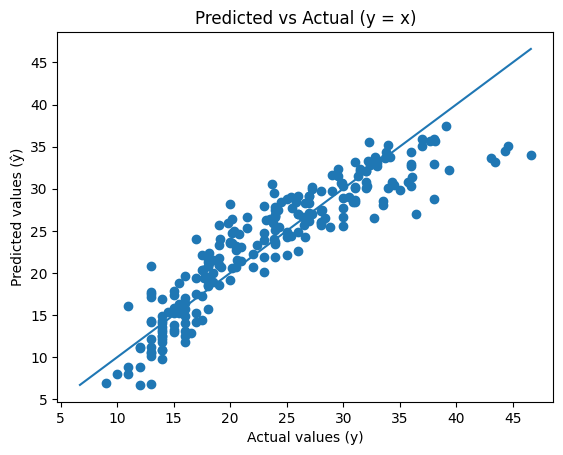

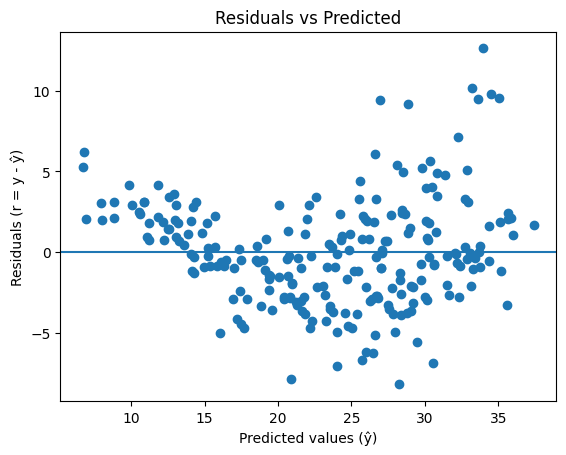

/Users/sergey/miniconda3/envs/mlf/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sergey/miniconda3/envs/mlf/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sergey/miniconda3/envs/mlf/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/sergey/miniconda3/envs/mlf/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was pass

,model,mse_train,rmse_train,mae_train,r2_train,mse_val,rmse_val,mae_val,r2_val,mse_test,rmse_test,mae_test,r2_test
0,Mean,65.237560,8.076977,6.815008,0.000000,51.186620,7.154482,6.011440,-0.005374,56.923104,7.544740,6.286900,-0.011481
1,Median,65.491404,8.092676,6.805957,-0.003891,51.967564,7.208853,6.024359,-0.020713,56.366962,7.507793,6.178481,-0.001599
2,Linear,11.154207,3.339791,2.565911,0.829022,10.153033,3.186382,2.528070,0.800581,11.505067,3.391912,2.689414,0.795563
3,Huber,11.573564,3.401994,2.502506,0.822594,9.596673,3.097850,2.412435,0.811508,11.437798,3.381981,2.583620,0.796759
4,Poison,8.398146,2.897956,2.164101,0.871268,8.813456,2.968746,2.253025,0.826892,8.090026,2.844297,2.103868,0.856246
5,Quantile,11.842488,3.441292,2.487353,0.818471,9.793954,3.129529,2.427513,0.807634,11.774960,3.431466,2.601122,0.790768
6,Tweedie,11.154207,3.339791,2.565894,0.829022,10.152970,3.186372,2.528056,0.800582,11.505129,3.391921,2.689409,0.795562


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import HuberRegressor,TweedieRegressor,LinearRegression,PoissonRegressor,QuantileRegressor
import matplotlib.pyplot as plt
for model in [{'model': 'Linear', 'class': LinearRegression()},
              {'model': 'Huber', 'class': HuberRegressor()},
              {'model': 'Poisson', 'class': PoissonRegressor(alpha=0)},
               {'model': 'Quantile', 'class': QuantileRegressor(quantile=0.5, alpha=0)},
                {'model': 'Tweedie', 'class': TweedieRegressor(power=0, alpha=0)} ]:

    linreg_pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("model", model['class'])
        ])

    linreg_pipeline.fit(X_train, y_train)
    y_train_pred = linreg_pipeline.predict(X_train)
    y_val_pred = linreg_pipeline.predict(X_val)
    y_test_pred = linreg_pipeline.predict(X_test)
    model_result = {'model': model['model']}
    model_result.update(get_metrics('train', y_train, y_train_pred))
    model_result.update(get_metrics('val', y_val, y_val_pred))
    model_result.update(get_metrics('test', y_test, y_test_pred))
    models_results.append(model_result)
    if model['model'] == 'Linear':
        plot_regression(y_train, y_train_pred)
result = pd.DataFrame(models_results)
result


# Итог
Poisson регрессия показывает лучший результат на всех выборках, это может быть продиктовано характером данных: mpg - это потребления топлива miles per gallon, оно не может быть отрицательным. Для остальных моделей мы задавали Гауссовское распределение, где это требовалось, на практике в данных нормальное симметричное распределение встречается довольно редко, в этой связи ассиметричное пуассоновское видимо лучше описывает природу данных. 

Более того, учитывая гетероскедастичность, Poisson модель справляется с этой задачей лучше еще и потому, что дисперсия в ней большей зависит от среднего.